# Question 3 (35%)
We have two dimensional real-valued data (x;y) that is generated by the following procedure,
where all polynomial coefficients are real-valued and v N (0;s2):
y = ax3+bx2+cx+d+v (2)
Let w = [a;b;c;d]T be the parameter vector for this polynomial relationship. Given the knowledge
of s and that the relationship between x and y is a cubic polynomial corrupted by additive
noise as shown above, iid samples D = (x1;y1); : : : ; (xN;yN) generated by the procedure using the
true value of the parameters (say wtrue), and a Gaussian prior w N (0; g2I), where I is the 44
identity matrix, determine the MAP estimate for the parameter vector.
Write code to generate N = 10 samples according to the model, draw iid x Uni f orm[􀀀1;1]
and choose the true parameters to place the real roots (for simplicity) for the polynomial in the
interval [􀀀1;1]. Pick a value for s (that makes the noise level sufficiently large), and keep it
constant for the experiments. Repeat the following for different values of g (note that as g increases
the MAP estimates approach the ML estimate).
Generate samples of x and v, then determine the corrsponding values of y. Given this particular
realization of the dataset D, for each value of g, find the MAP estimate of the parameter vector and
calculate the squared L2 distance between the true parameter vector and this estimate.
For each value of g perform at least 100 experiments, where the data is independently generated
according to the procedure, while keeping the true parameters fixed. Report the minimum, 25%,
median, 75%, and maximum values of these squared-error values, kwtrue􀀀wMAPk22
, for the MAP
estimator for each value of g in a single plot. How do these curves behave as this parameter for the
prior changes?
Note: Make sure to change gamma to cover a sufficiently broad range to see its effects at
multiple scales. To achieve this, you might want to select values for this hyperparameter as power
of 10 linearly spaced from 􀀀B to +B, so that you cover the interval [10􀀀B;10B] logarithmically.
Choose B > 0 well.

In [1]:
# Importing the necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Defining the polynomial function
def b(x):
    return [x**3, x**2, x, 1]

In [51]:
# Generating the samples without noise
W_true = [2, 0, -1.28, 0]
X = np.random.uniform(-1, 1, 10)
Y_pure = []
for x in X:
    Y_pure.append(np.array(W_true).dot(b(x)))

Plotting the third degree polynomial having roots between -1, 1 without any noise

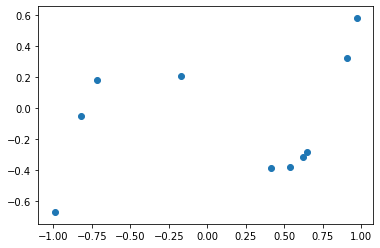

In [52]:
plt.scatter(X,Y_pure)

In [55]:
# Corrupting the samples with noise
Y = []
v = np.random.normal(loc=0, scale=0.4)
for y in Y_pure:
    Y.append(y + v)

Plotting the same third degree polynomial with noise

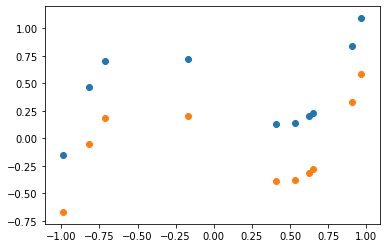

In [101]:
plt.scatter(X, Y)
plt.scatter(X, Y_pure)

In [76]:
def calculate_BX(X):
    BX = []
    [BX.append(b(x)) for x in X]
    return BX

In [93]:
def wmap(Y, BX, gamma, sigma):
    gamma_square_matrix = (sigma**2)*np.linalg.inv(gamma**2*np.identity(4))
    term2 = []
    [term2.append(np.matmul(np.reshape(bx, (4,1)), np.reshape(bx, (1,4)))) for bx in BX]
    left_term = gamma_square_matrix + sum(term2)
    BY_term = []
    [BY_term.append(np.reshape(bx, (4,1))*y) for y,bx in zip(Y, BX)]
    wmap = np.matmul(np.linalg.inv(left_term),sum(BY_term))
    return wmap

In [95]:
W_MAP = wmap(Y, calculate_BX(X), 10**(-1), 0.8)

In [97]:
L2_squared_distance = np.linalg.norm(np.reshape(W_true, (4,1)) - W_MAP)

In [98]:
def generate_dataset(sigma, W_true):
    # Generating the samples without noise
    X = np.random.uniform(-1, 1, 10)
    Y_pure = []
    for x in X:
        Y_pure.append(np.array(W_true).dot(b(x)))
    # Corrupting the samples with noise
    Y = []
    v = np.random.normal(loc=0, scale=0.4)
    for y in Y_pure:
        Y.append(y + v)
    return X, Y

In [178]:
W_true = [2, 0, -1.28, 0]

In [223]:
# Generating W-Map for a range of gamma values by performing 100 experiments for each value
# Sampling individually in every experiment
def get_gamma_l2list_dict(gamma, sigma):
    gamma_l2list_dict = {}
    for gamma in np.linspace(10**(-gamma), 10**(gamma), 20):
        L2_squared_distance_list = []
        WMAP_list = []
        for i in range(100):
            X, Y = generate_dataset(sigma, W_true)
            W_MAP = (wmap(Y, calculate_BX(X), gamma, sigma))
            L2_squared_distance_list.append(np.linalg.norm(np.reshape(W_true, (4,1)) - W_MAP))
            L2_squared_distance_list.sort()
        gamma_l2list_dict[gamma] = L2_squared_distance_list
    return gamma_l2list_dict

In [229]:
def generate_statistical_plots_for_gamma(gamma, sigma):
    # Initializing the lists that will store the statistical data for each value of gamma
    Min_report = []
    twenty_five_percent = []
    fifty_percent = []
    seventy_five_percent = []
    Max_report = []

    # Getting the L2-list values for the given Gamma through 100 experiments
    gamma_l2list_dict = get_gamma_l2list_dict(gamma, sigma)

    # Populating the lists with appropriate values
    [Min_report.append(l2_list[0]) for l2_list in gamma_l2list_dict.values()]
    [twenty_five_percent.append(l2_list[24]) for l2_list in gamma_l2list_dict.values()]
    [fifty_percent.append(l2_list[49]) for l2_list in gamma_l2list_dict.values()]
    [seventy_five_percent.append(l2_list[74]) for l2_list in gamma_l2list_dict.values()]
    [Max_report.append(l2_list[99]) for l2_list in gamma_l2list_dict.values()]

    # Generating the plots
    plt.plot(list(gamma_l2list_dict.keys()), Min_report, label='Minium Value')
    plt.plot(list(gamma_l2list_dict.keys()), twenty_five_percent, label='25% Value')
    plt.plot(list(gamma_l2list_dict.keys()), fifty_percent, label='Median Value')
    plt.plot(list(gamma_l2list_dict.keys()), seventy_five_percent, label='75% Value')
    plt.plot(list(gamma_l2list_dict.keys()), Max_report, label='Maximum Value')
    plt.xlabel('Values of Gamma for B = {}'.format(gamma))
    plt.ylabel('L2 squared distance')
    plt.title('Plot statistics of Gamma versus L2 Norm distance W-true and W-Map')
    plt.legend()

## Case 1: Gamma = 0.5

<IPython.core.display.Javascript object>


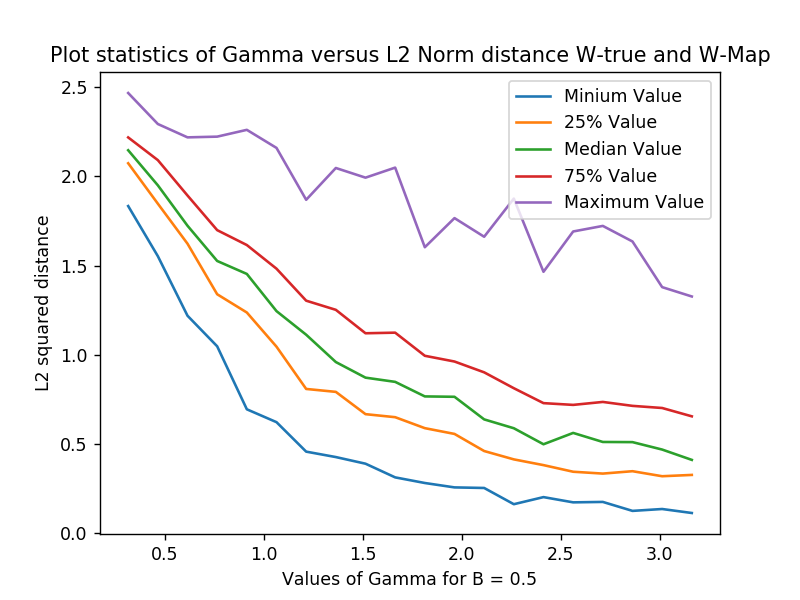

In [231]:
%matplotlib notebook
generate_statistical_plots_for_gamma(0.5, 0.3)

## Inference
When the Gamma is really small, there is a high difference between the estimated parameter and the true parameters of W.
The Maximum, Median, 25th, 75th and the Minimum values for every Gamma are very far from the True values when the gamma is small. As Gamma starts increasing the values slowly start converging towards the True parameters making the L2 difference less.
But the Maximum L2 difference between the Estimated and True parameters still remains high depending upon the noise that we consider for our experiment. And after a certain point, all our curves remain constant and stay at the same level regardless of the change in Gamma.

## Case 2: Gamma = 1.0

<IPython.core.display.Javascript object>


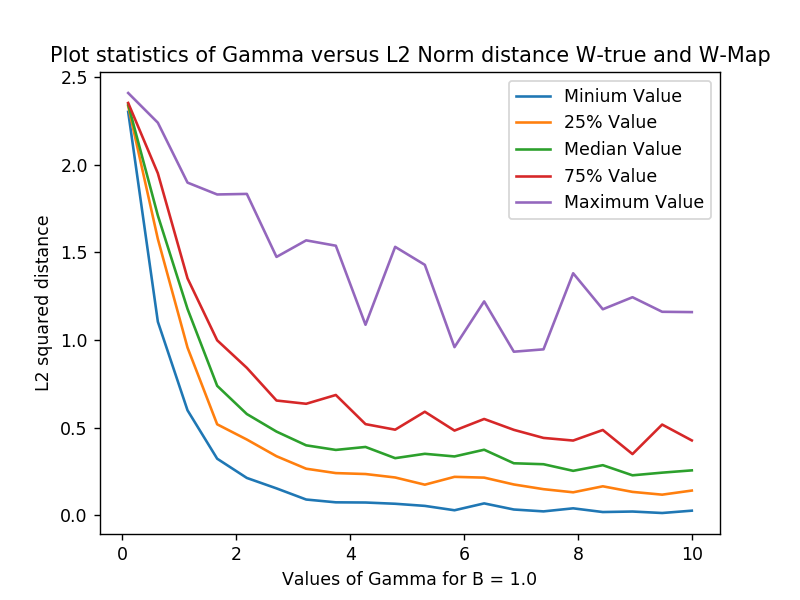

In [232]:
%matplotlib notebook
generate_statistical_plots_for_gamma(1.0, 0.3)

## Case 3: Gamma = 4.0

<IPython.core.display.Javascript object>


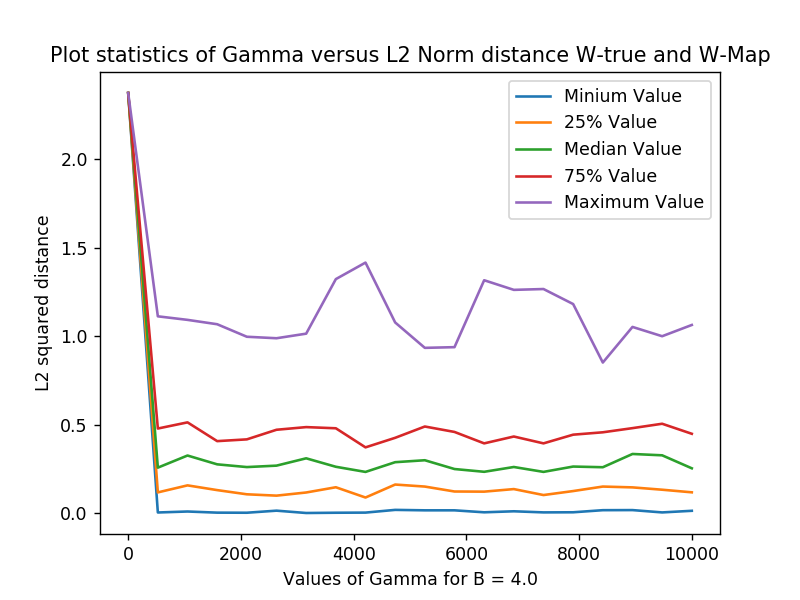

In [233]:
%matplotlib notebook
generate_statistical_plots_for_gamma(4.0, 0.3)